# College Baseball - Period Report
## Report Methodology
1. First, we setup the report parameters to 'zoom in' on the desired players and desired start and end dates (report period). 

2. Then, we connect the players to their organization rosters, schedules and game stats. 

3. Finally we show the Pitching and Hitting stats for the connected players in the given report period.



# 1 Setup the report parameters

In [1]:
import cb_period_report_utils
import time
print("Run time: {0}".format(time.strftime("%Y-%m-%d %H:%M")))
%matplotlib inline

DATA_MODULE_YEAR = "2018"
PLAYING_SEASON = "2017"
PSETNAME = "CBN 2017"
START_DATE = "2017-02-01"
END_DATE = "2017-06-30"
report = cb_period_report_utils.PeriodReport(DATA_MODULE_YEAR, PLAYING_SEASON, PSETNAME, START_DATE, END_DATE)

Run time: 2017-08-01 21:24
Period Report for CBN 2017 with playing season 2017 and date range 2017-02-01-2017-06-30 inclusive


# 2 Connect players to their org rosters, schedules and game stats

## 2.1 Org Rosters
We have all schools rosters ... which we use to lookup CBN players to find their ORG_PID.  Players without an ORG_PID  cannot be tracked, so the matching is critical. Therefore we need ALL ROSTERS.  Downstream in this workflow, if there are any org rosters missing it will complain so we can fix.

In [2]:
report.print_org_rosters_info()

1578 schools with 52631 players


## 2.2 CBN Roster

The CBN roster comes from the CBN web page.   We match these players to the org rosters to get their ORG_PID.  Players that are not connected cannot be tracked.  We end up with two types of players:
1. Connected players with an ORG_PID which can be tacked
2. Unconnectedplayers with no ORG_PID and cannot be tracked

Effort was made to understand why some players are "Unconnected" players.   It turns out there are two types of unconnected players:
- 50 of the 67 unconnected players are not found on the official organization roster, but may be present on the larger school roster
- 17 of the 67 unconnected players are NCAA players that are on the schools ORG roster, but never played a game (and have not been issued an NCAA player ID number).


In [3]:
report.print_ipg_roster_info()

STATUS: GOOD - All schools is PSET are in ORG rosters allowing us to try to match each player to their ORG_PID
... All players: 755 players with 333 schools
... Connected players: 688 players with 314 schools
... Unconnected players: 67 players with 19 schools


##  2.3 Org Schedules
We collect the schedules of the schools in the PSET with players with valid PIDS.  We do this so we can see if a team has played games and posted the game stats which is useful for detecting late reporting (downstream). 

If a team has a game scheduled in the period, but the game score is not available, then we know that either the game was not played or the game stats are being reported late.   Downstream in the workflow we classify players as to which team have missing scheduled games (late reporting). We also can tell i the team was idle in the period (no games scheduled) then we don't worry if a player has no stats (since the team was idle).  


In [4]:
report.print_org_schedule_info()

STATUS: GOOD - All schools in PSET are in ORG schedules allowing us to detect Games Played (GP)
... GAMES PLAYED: 314 schools with 13430 unique GP in schedule


## 2.4 Show the connection table

In [5]:
report.print_school_info()

,Players,Schools,GP
CCCAA,22,13,451
NAIA,172,60,2505
NCAA,244,150,6727
NJCAA,212,83,3434
NWAC,35,6,233
USCAA,3,2,80
Totals,688,314,13430


# 3 Pitching Stats
In this section we desribe the player statistics for the period, including:
1. Overall counts, which shows the total count of players, appearances, and unique games (if two teams we are tracking play each other, it is counted as one game)
2. Stats distribution, which shows a basic description of each individual stat, showing count, mean, std, min, max and quartiles
3. Org counts, which shows a breakdown by Organization that were active in the period
4. Stat leaders, which shows a list of player names that lead in various stats
5. IP/ERA plot which plots each player's total IP/ERA for the period


## 3.1 Overall counts

In [6]:
pstats = cb_period_report_utils.Pstats(report)
pstats.print_summary()

PERIOD STATS: 286 players made 2799 appearances in 1855 unqiue games


## 3.2 Stats distribution

In [7]:
pstats.get_summ_df().describe().T

,count,mean,std,min,25%,50%,75%,max
App,286.0,9.786713,5.733249,1.000,5.000,10.0000,13.00000,28.000
GS,286.0,3.010490,4.086335,0.000,0.000,1.0000,5.00000,15.000
IP,286.0,25.843497,22.267429,0.333,7.333,19.1665,39.24975,111.333
H,286.0,29.562937,24.681719,0.000,9.000,24.0000,45.75000,103.000
R,286.0,20.632867,16.496087,0.000,7.000,16.5000,31.00000,73.000
BB,286.0,12.779720,9.606489,0.000,5.000,11.0000,19.00000,46.000
K,286.0,21.405594,21.004006,0.000,5.000,15.0000,31.75000,121.000
ER,286.0,16.339161,13.531004,0.000,5.000,13.0000,24.00000,67.000
HR,286.0,1.965035,2.604753,0.000,0.000,1.0000,3.00000,14.000
W,286.0,1.650350,2.090106,0.000,0.000,1.0000,3.00000,10.000


## 3.3 Org counts

In [8]:
pstats.get_org_Pstats()

,Players,Schools,IP,GS,W,SV,GS MAX,W MAX,SV MAX
ORG,,,,,,,,,
CCCAA,5,3,86,11,5,4,10,4,4
NAIA,70,34,1878,257,119,28,15,10,6
NCAA,98,71,2641,333,153,37,15,9,9
NJCAA,93,54,2372,260,183,54,14,7,11
NWAC,19,6,392,NA,12,1,0,6,1
USCAA,1,1,19,0,0,0,0,0,0
Totals,286,169,7391,861,472,124,54,,


## 3.4 Stat leaders

In [9]:
pstats.print_leaders()

Pitching leaders
App: Ryo Takenaka had 28 App
GS: Noah Gapp, J.P. Stevenson had 15 GS
IP: Noah Gapp had 111 IP
K: Noah Gapp had 121 K
SV: Dalton Harvey had 11 SV


## 3.5 Plot of each player's total IP/ERA in period

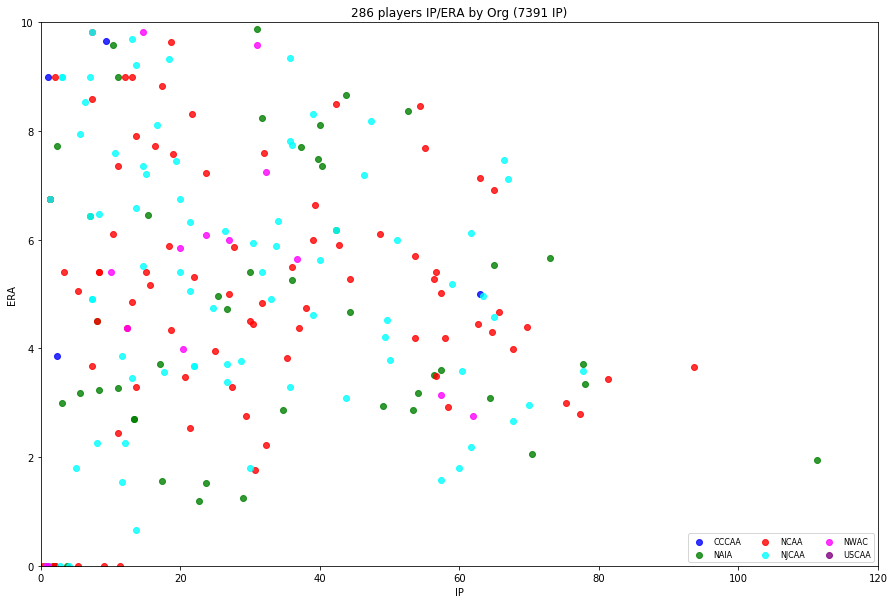

In [10]:
cb_period_report_utils.plot_players(pstats.get_summ_df(), xcol='IP', ycol='ERA')

# 4 Hitting Stats
In this section we desribe the player statistics for the period, including:
1. Overall counts, which shows the total count of players, appearances, and unique games (if two teams we are tracking play each other, it is counted as one game)
2. Stats distribution, which shows a basic description of each individual stat, showing count, mean, std, min, max and quartiles
3. Org counts, which shows a breakdown by Organization that were active in the period
4. Stat leaders, which shows a list of player names that lead in various stats
5. AB/OPS plot which plots each player's total AB/OPS for the period


## 4.1 Overall counts

In [11]:
hstats = cb_period_report_utils.Hstats(report)
hstats.print_summary()

PERIOD STATS: 498 players made 13581 appearances in 6435 unqiue games


## 4.2 Stats distribution

In [12]:
hstats.get_summ_df().describe().T

,count,mean,std,min,25%,50%,75%,max
App,498.0,27.271084,16.984453,1.0,13.00000,26.000,40.00000,68.0
PA,224.0,77.294643,85.985882,0.0,0.00000,46.000,141.25000,303.0
AB,498.0,75.670683,68.660920,0.0,9.25000,64.000,124.75000,266.0
H,498.0,22.287149,23.678342,0.0,1.00000,15.500,34.75000,105.0
R,498.0,15.022088,17.037464,0.0,1.00000,9.500,24.00000,89.0
RBI,498.0,14.289157,17.167559,0.0,1.00000,9.000,20.75000,91.0
2B,498.0,4.528112,5.582400,0.0,0.00000,2.000,7.00000,27.0
3B,498.0,0.582329,1.139314,0.0,0.00000,0.000,1.00000,8.0
HR,498.0,1.823293,3.323730,0.0,0.00000,0.000,2.00000,24.0
TB,378.0,35.240741,39.890337,0.0,0.00000,21.500,58.75000,170.0


## 4.3 Stats by Org

In [13]:
hstats.get_org_Hstats()

,Players,Schools,AB,H,HR,RBI,AB MAX,H MAX,HR MAX
ORG,,,,,,,,,
CCCAA,22,13,1029,229,5,116,141,42,1
NAIA,99,41,7191,2074,149,1272,238,105,24
NCAA,154,113,14921,4304,332,2531,266,96,20
NJCAA,199,80,13282,4191,416,3079,254,103,21
NWAC,21,3,1036,234,6,93,125,34,3
USCAA,3,2,225,67,0,25,135,41,0
Totals,498,252,37684,11099,908,7116,,,


## 4.4 Stats leaders

In [14]:
hstats.print_leaders()

Hitting leaders
AB: Tristan Pompey had 266 AB
H: Christopher Acosta-Tapia had 105 H
2B: Christopher Acosta-Tapia had 27 2B
3B: Toby Handley, Tyler Duncan had 8 3B
HR: Christopher Acosta-Tapia had 24 HR
RBI: Eric Senior had 91 RBI
BB: Tristan Pompey had 46 BB
HBP: Nolan Bumstead, Justin Graff-Rowe, Jared Young had 18 HBP


## 4.5 Plot of each players total AB/OPS for the period

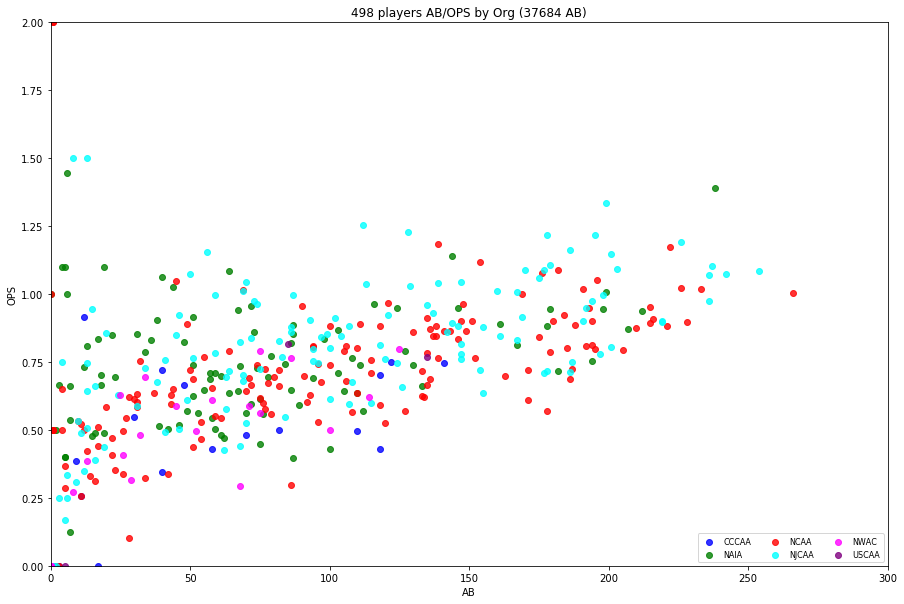

In [15]:
cb_period_report_utils.plot_players(hstats.get_summ_df(), xcol='AB', ycol='OPS')